# Synopsis

Create word embeddings with novel data using word2vec. Visualize with tSNE.

# Libraries

In [19]:
import pandas as pd
import numpy as np
import sqlite3
import sys
import textman as tx

import sys, os
from gensim.models import word2vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Configuration

In [2]:
db_file_names = [
                 'db/a_tale_of_two_cities.db',
                 'db/anna_karenina.db',
                 'db/captains_courageous.db',
                 'db/emma.db',
                 'db/far_from_madding_crowd.db',
                 'db/heart_of_darkness.db',
                 'db/jane_eyre.db',
                 'db/pride_and_prejudice.db',
                 'db/portrait_of_a_lady_vol1.db',
                 'db/portrait_of_a_lady_vol2.db'
                 ]

# Pragmas

In [3]:
%matplotlib inline

# Process

## Import tokens and convert to a corpus for Gensim

In [4]:
OHCO = ['chap_num','para_num','sent_num']
tokens_list = []
corpora = []
for db_file_index in range(0, len(db_file_names)):
    tokens = tx.get_table('token', db_file_names[db_file_index])
    tokens = tokens[~tokens.term_str.isna()]
    tokens_list.append(tokens)
    corpus = tokens.groupby(OHCO).term_str.apply(lambda  x:  x.tolist())\
        .reset_index()['term_str'].tolist()
    corpora.append(corpus)

## Generate word embeddings with Gensim's library

In [7]:
model_list = []
for corpus_index in range(0, len(corpora)):
    model = word2vec.Word2Vec(corpora[corpus_index], size=246, window=5, min_count=200, workers=4)
    model_list.append(model)

## Visualize with tSNE

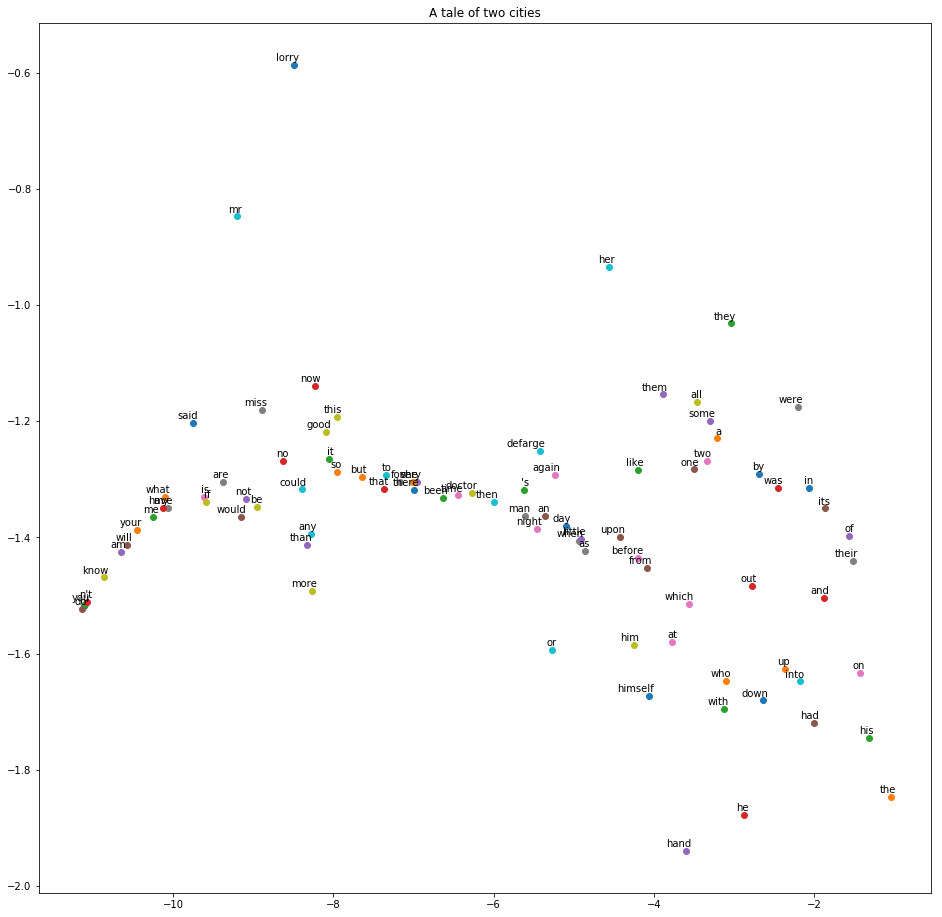

<Figure size 432x288 with 0 Axes>

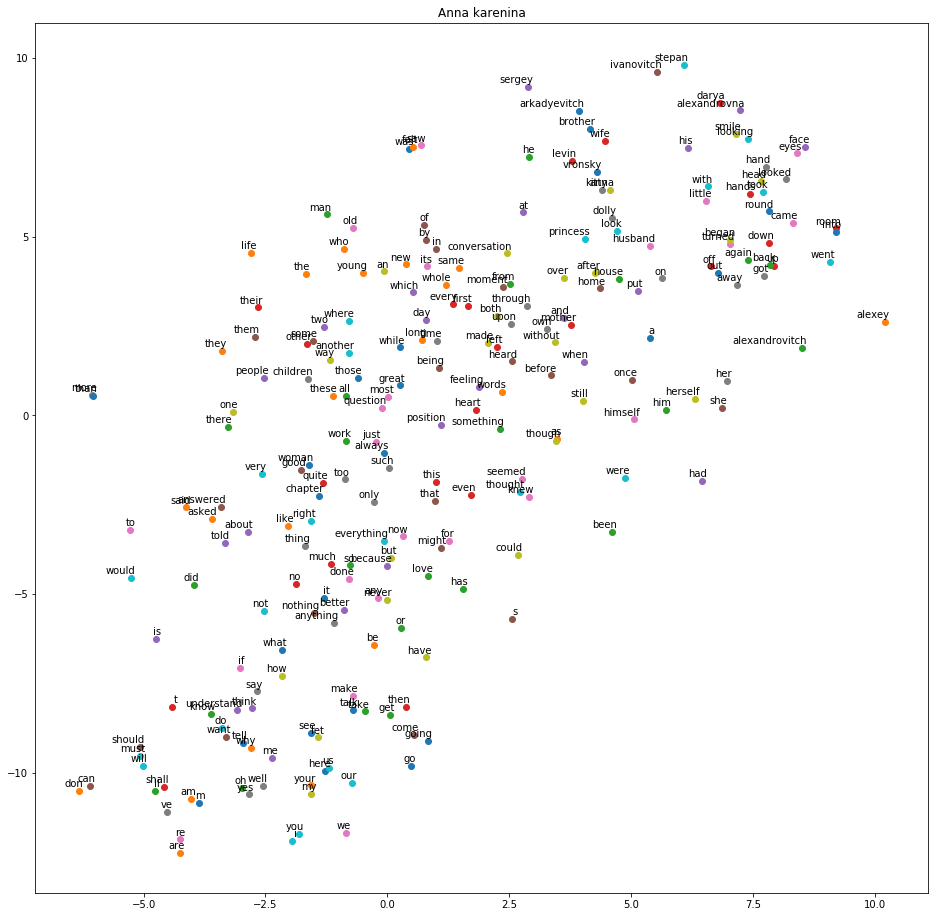

<Figure size 432x288 with 0 Axes>

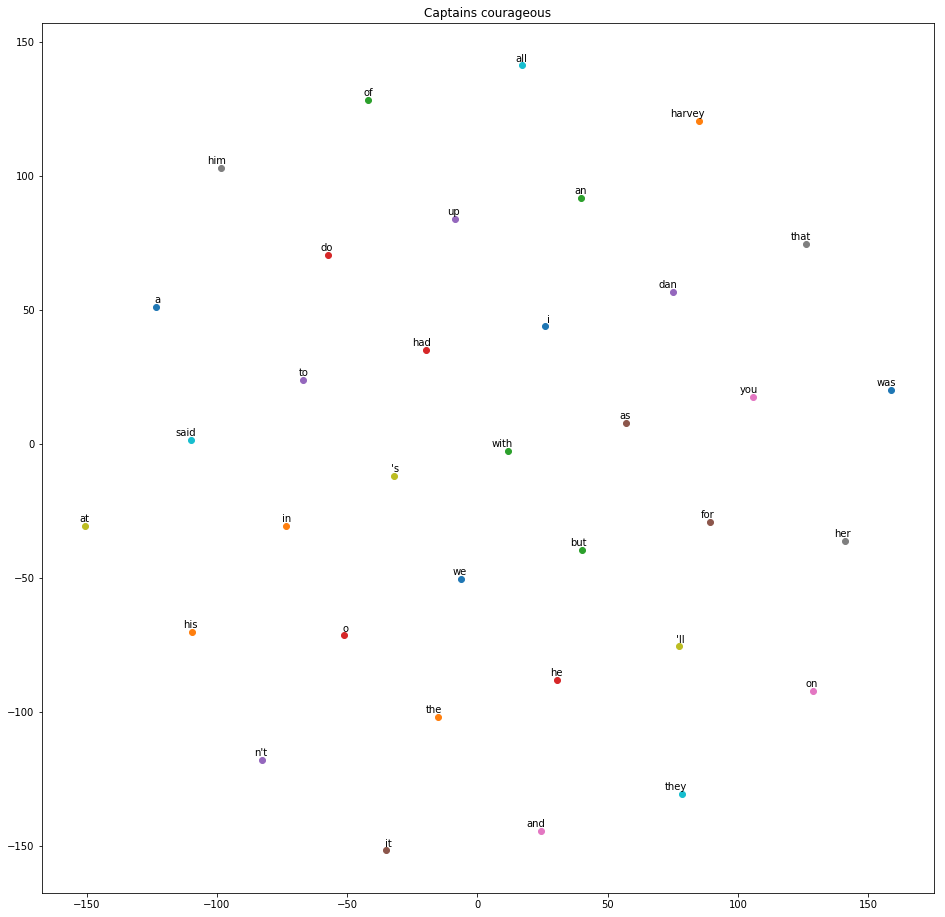

<Figure size 432x288 with 0 Axes>

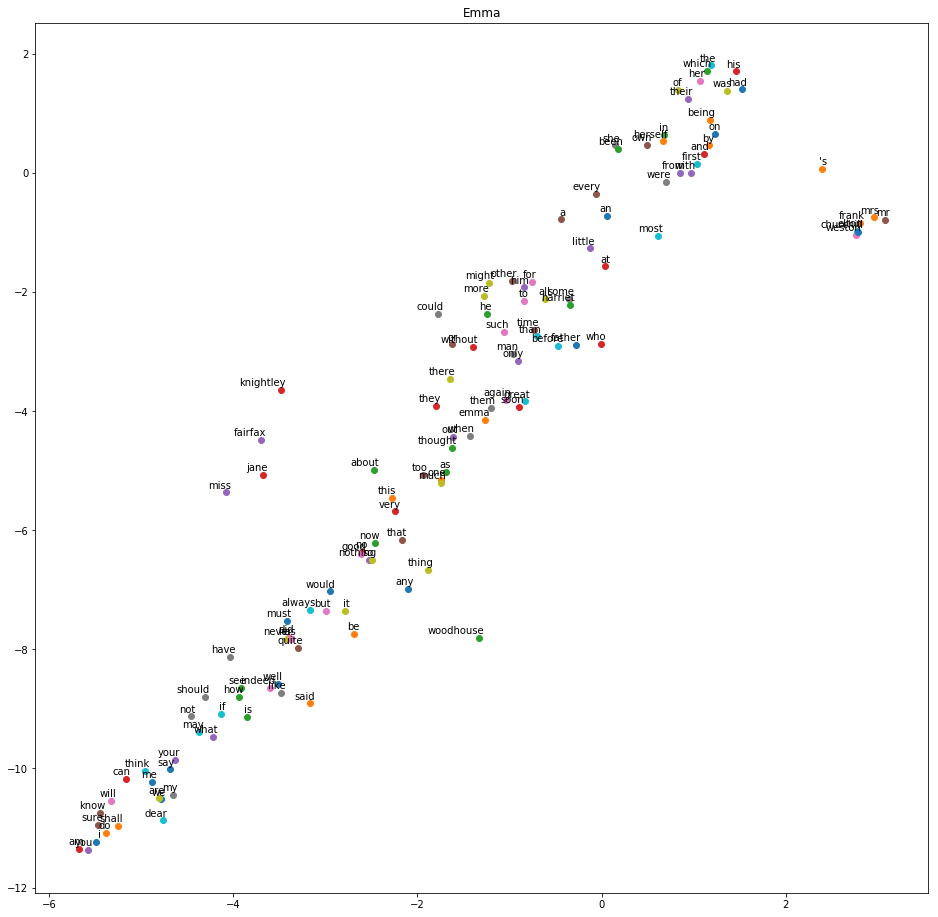

<Figure size 432x288 with 0 Axes>

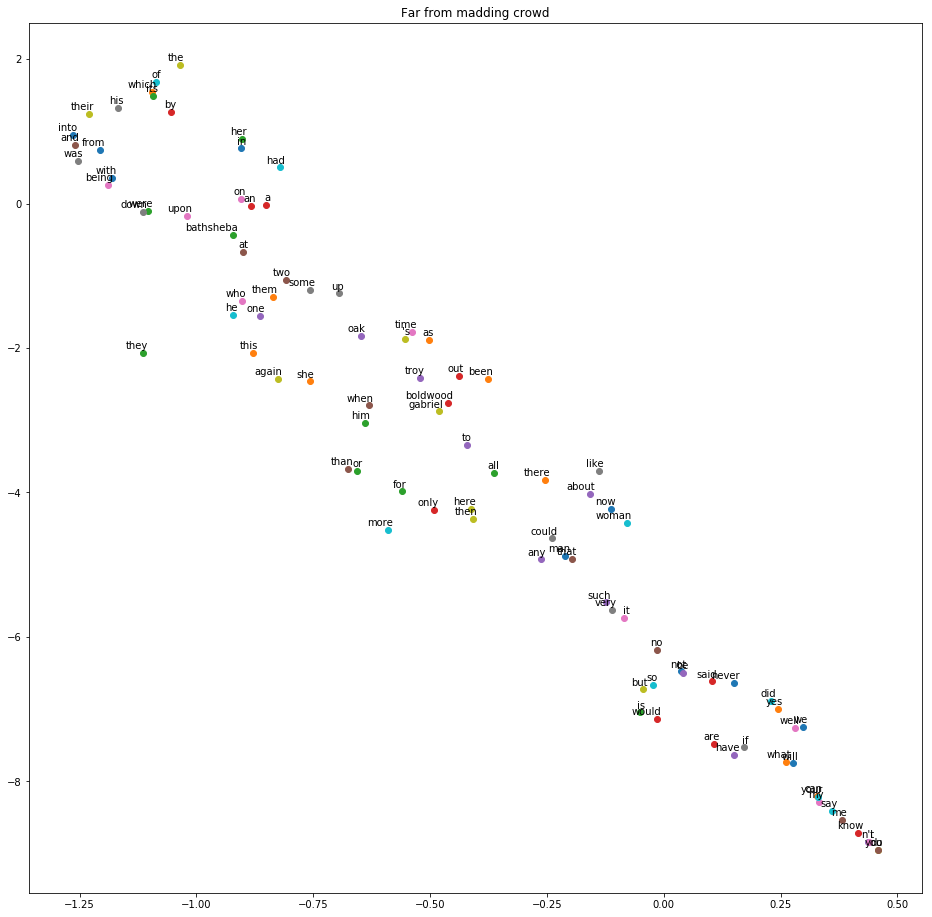

<Figure size 432x288 with 0 Axes>

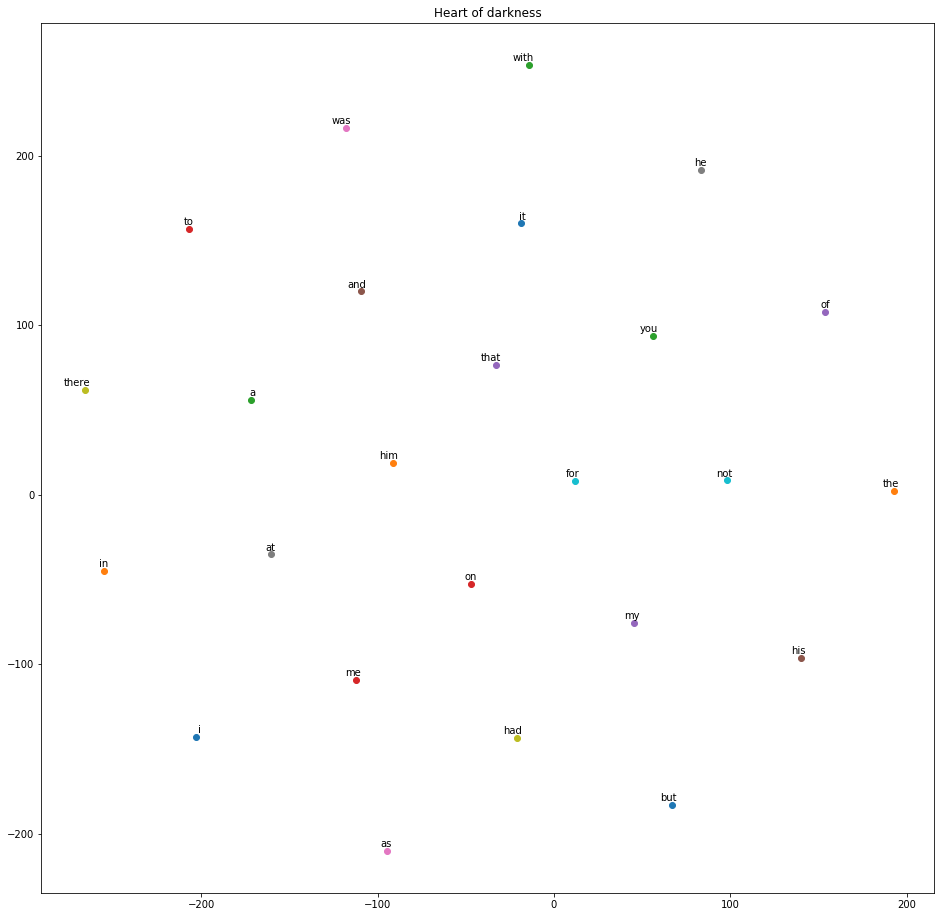

<Figure size 432x288 with 0 Axes>

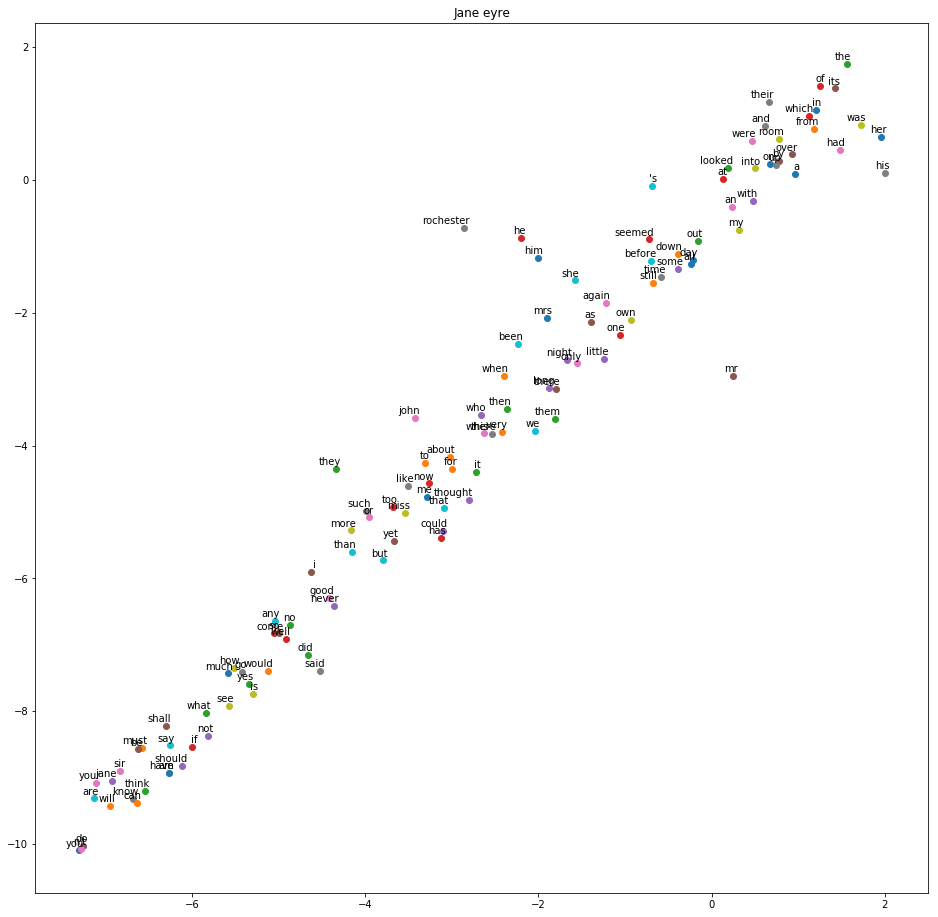

<Figure size 432x288 with 0 Axes>

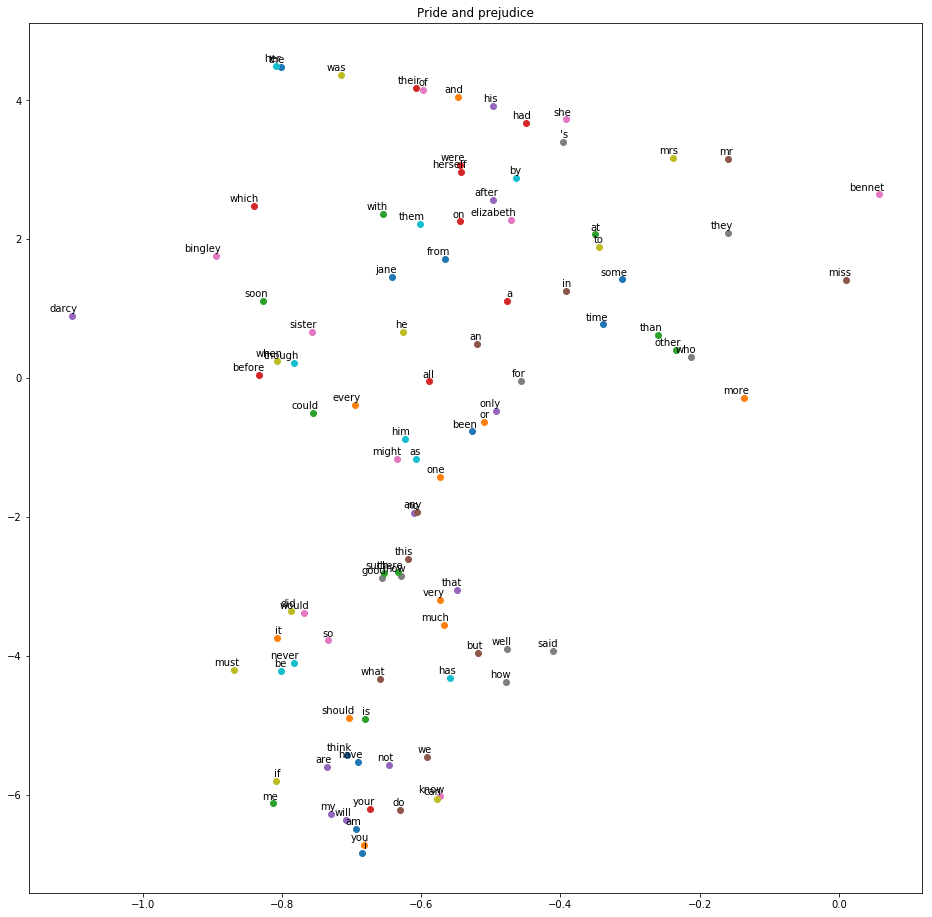

<Figure size 432x288 with 0 Axes>

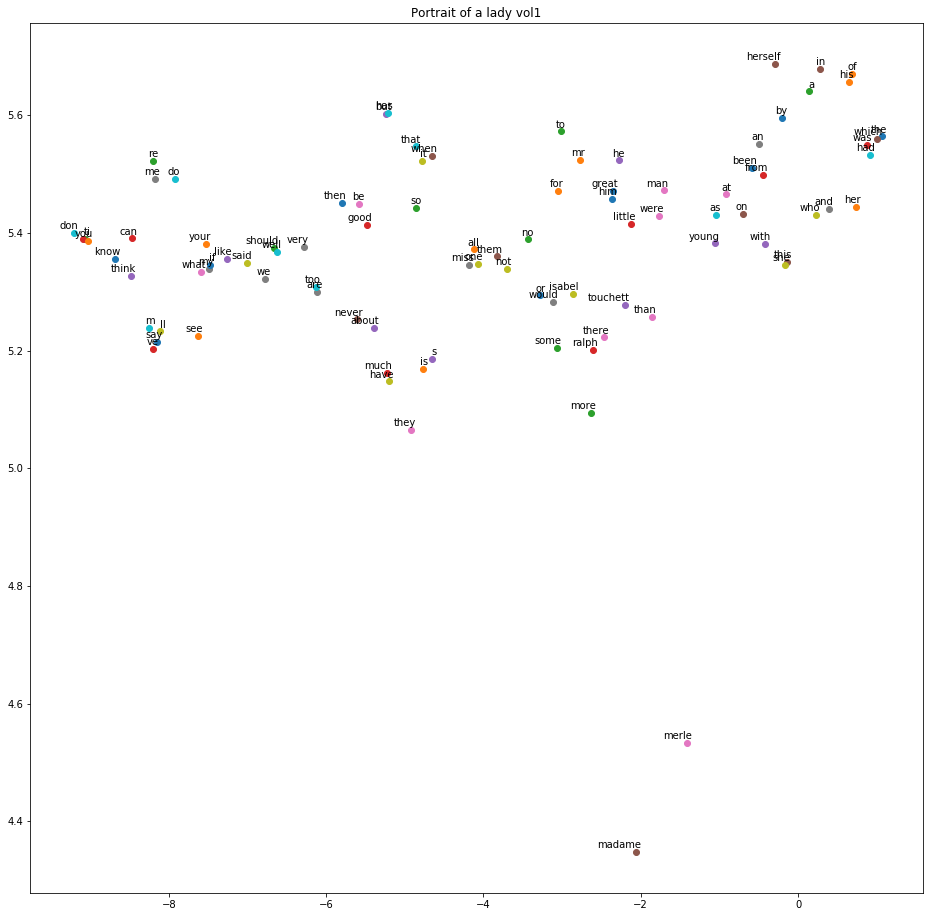

<Figure size 432x288 with 0 Axes>

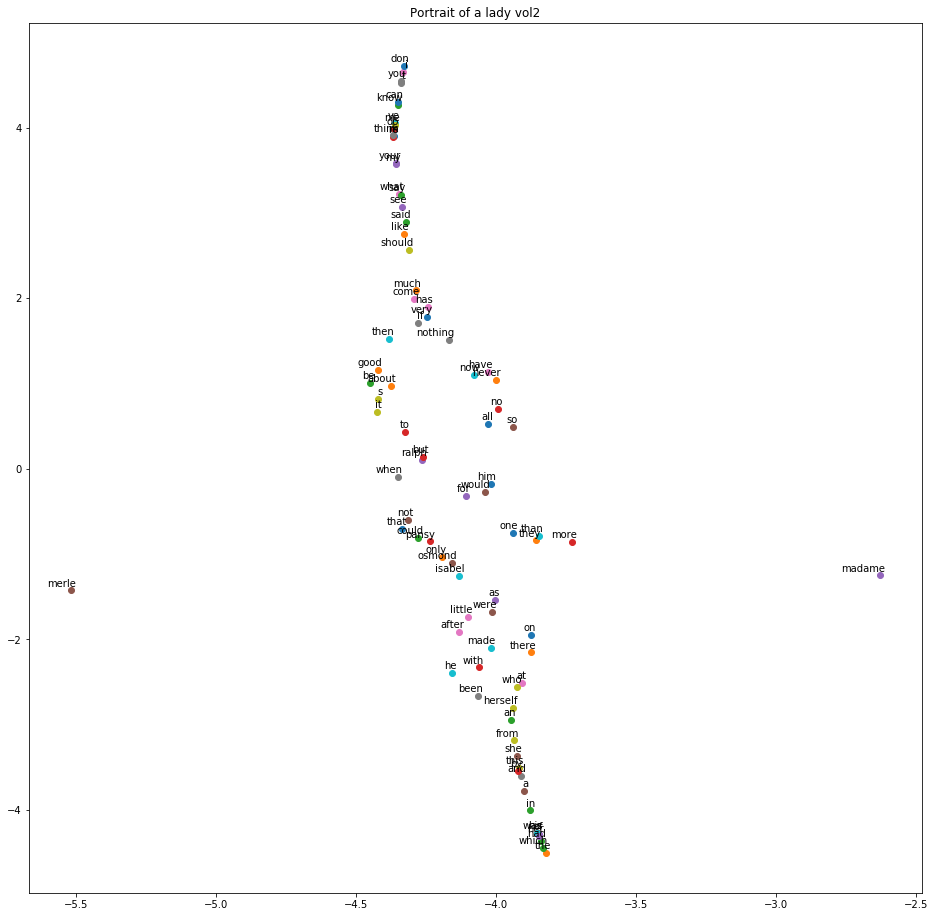

<Figure size 432x288 with 0 Axes>

In [21]:
if not os.path.exists('word_embeddings/'):
        os.makedirs('word_embeddings/')
        
for model_index in range(len(model_list)):
    name = db_file_names[model_index]
    name = name.replace('db', '')
    name = name.replace('/', '')
    name = name.replace('.', '')
    plt_name = name + '.png'
    name = name.replace('_', ' ').capitalize()
    
    ### Generate coordinates to plot
    coords = pd.DataFrame(index=range(len(model_list[model_index].wv.vocab)))
    coords['label'] = [w for w in model_list[model_index].wv.vocab]
    coords['vector'] = coords['label'].apply(lambda x: model_list[model_index].wv.get_vector(x))
    
    ### Use ScikitLearn's TSNE library
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    tsne_values = tsne_model.fit_transform(coords['vector'].tolist())
    
    coords['x'] = tsne_values[:,0]
    coords['y'] = tsne_values[:,1]
        
    ### Plot the coordinates
    plt.figure(figsize=(16, 16)) 
    for i in range(len(coords)):
        plt.title(name)
        plt.scatter(coords.x[i],coords.y[i])
        plt.annotate(coords.label[i],
                     xy=(coords.x[i], coords.y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    plt.savefig('word_embeddings/' + plt_name)